In [1]:
import numpy as np
import torch
from sklearn.cluster import KMeans
import ot
import ot.plot
import matplotlib.pylab as pl

In [2]:
import sys
sys.path.append('../code/')
sys.path.append('../code/Latent_OT')
from generate_data import make_data
from Latent_OT import LOT_freesupp,LOT_fixsupp

In [3]:
def compute_kmeans_centroids(X, **kwargs):
    kmeans = KMeans(**kwargs).fit(X)
    return kmeans.cluster_centers_

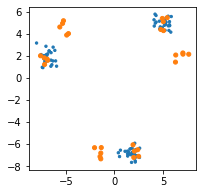

In [4]:
n,m,d=90,15,2
X,_=make_data("mog_reg",n,d)
Y1,Y2=make_data("mog_reg",m,d)
Y=torch.cat((Y1,Y2))
m=2*m
X,Y=X.numpy(),Y.numpy()
a,b=np.ones((n,))/n,np.ones((m,))/m

pl.figure(figsize=(3,3))
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*500)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*500)

In [5]:
n_source_anchors = 18
n_target_anchors = 7

Zx = compute_kmeans_centroids(X, n_clusters=n_source_anchors)
Zy = compute_kmeans_centroids(Y, n_clusters=n_target_anchors)


mu= np.ones((n,))/n
nu = np.ones((m,))/n
#mu=np.random.randint(1, 5, (n,)).astype(float)
#mu/=np.sum(mu)

#print(mu,nu)

eps = 1
Cx,Cy,Cz=ot.dist(X,Zx),ot.dist(Zy,Y),ot.dist(Zx,Zy)
Gx = np.exp(-Cx / eps)
Gz = np.exp(-Cz / eps)
Gy = np.exp(-Cy / eps)

Px, Py, Pz, P=LOT_fixsupp(Gx, Gz, Gy,mu,nu, niter=500)

0.30663872564936545


Text(0.5, 1.0, 'Source to target (through anchors)')

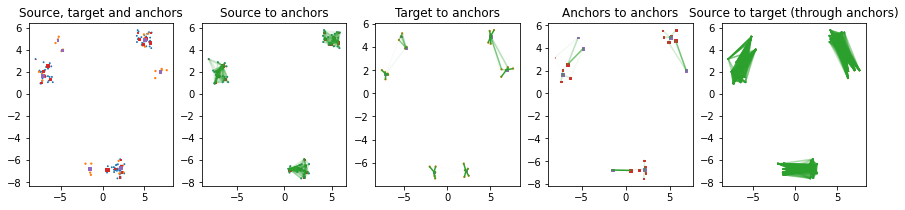

In [6]:
s=1e2
pl.figure(figsize=(15,3))
pl.subplot(1,5,1)
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=np.sum(Px,1)*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=np.sum(Py,0)*s)
pl.scatter(Zx[:, 0], Zx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
pl.scatter(Zy[:, 0], Zy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")
pl.title("Source, target and anchors")

pl.subplot(1,5,2)
ot.plot.plot2D_samples_mat(X,Zx, Px, c='C2')
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=np.sum(Px,1)*s)
pl.scatter(Zx[:, 0], Zx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
pl.title("Source to anchors")

pl.subplot(1,5,3)
ot.plot.plot2D_samples_mat(Zy,Y, Py, c='C2')
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=np.sum(Py,0)*s)
pl.scatter(Zy[:, 0], Zy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")
pl.title("Target to anchors")

pl.subplot(1,5,4)
ot.plot.plot2D_samples_mat(Zx,Zy, Pz, c='C2')
pl.scatter(Zx[:, 0], Zx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
pl.scatter(Zy[:, 0], Zy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")
pl.title("Anchors to anchors")

pl.subplot(1,5,5)
ot.plot.plot2D_samples_mat(X,Y, P, c='C2')
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=np.sum(Px,1)*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=np.sum(Py,0)*s)
pl.title("Source to target (through anchors)")

In [7]:
np.sum(Px),np.sum(Py),np.sum(Pz),np.sum(P)

(0.6933612743506348,
 0.48074985676913234,
 0.4807498567691353,
 0.4807498567691353)

In [12]:
np.sum(Pz,1),np.sum(Pz, 0)

(array([0.0730131 , 0.03146073, 0.02680832, 0.0207899 , 0.06650428,
        0.05364346, 0.01935156, 0.01969231, 0.02485614, 0.02864802,
        0.00605036, 0.01193335, 0.01792739, 0.01430573, 0.01264803,
        0.01810346, 0.02051557, 0.01449815]),
 array([0.08074489, 0.0269336 , 0.09647705, 0.08149922, 0.07950506,
        0.0637729 , 0.05181714]))

In [54]:
X.shape,Y.shape,Zx.shape,Zy.shape

((90, 2), (15, 2), (18, 2), (7, 2))

In [55]:
Px.shape,Py.shape,Pz.shape,P.shape

((90, 18), (7, 15), (18, 7), (90, 15))

In [6]:
Cx,Cy,Px,Py,Pz,P = fit(X,Y,n_source_anchors= n_source_anchors, n_target_anchors= n_target_anchors, epsilon=eps, epsilon_z=eps)
Zx,Zy=compute_kmeans_centroids(X, n_clusters=n_source_anchors),compute_kmeans_centroids(Y, n_clusters=n_target_anchors)

NameError: name 'fit' is not defined

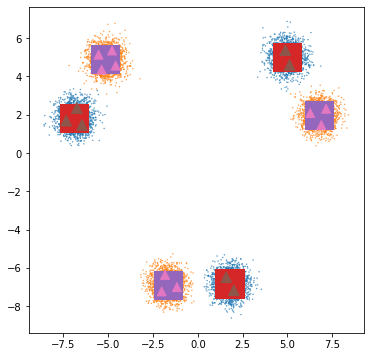

In [113]:
s=8e2
pl.figure(figsize=(6,6))
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*s)
pl.scatter(Cx[:, 0], Cx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
pl.scatter(Cy[:, 0], Cy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")
pl.scatter(Zx[:, 0], Zx[:, 1], c='C5', label='Source',s=(np.ones((n_source_anchors,))/n_source_anchors)*s,marker="^")
pl.scatter(Zy[:, 0], Zy[:, 1], c='C6', label='Target',s=(np.ones((n_target_anchors,))/n_target_anchors)*s,marker="^")

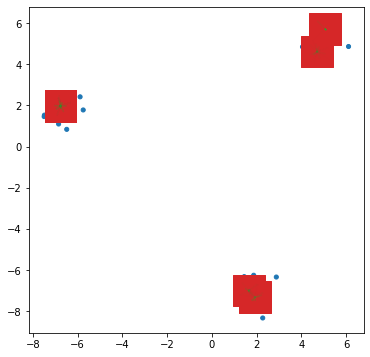

In [103]:
s=1e3
pl.figure(figsize=(6,6))
ot.plot.plot2D_samples_mat(X,Cx, Px, c='C2')
#ot.plot.plot2D_samples_mat(Cy,Y, Py, c='C2')
#ot.plot.plot2D_samples_mat(X,Y, P, c='C2')
#ot.plot.plot2D_samples_mat(Cx,Cy, Pz, c='C2')
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*s)
#pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*s)
pl.scatter(Cx[:, 0], Cx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
#pl.scatter(Cy[:, 0], Cy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")

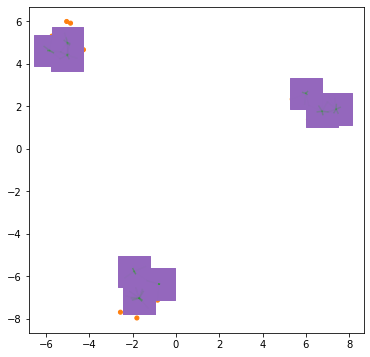

In [104]:
s=1e3
pl.figure(figsize=(6,6))
#ot.plot.plot2D_samples_mat(X,Cx, Px, c='C2')
ot.plot.plot2D_samples_mat(Cy,Y, Py, c='C2')
#ot.plot.plot2D_samples_mat(X,Y, P, c='C2')
#ot.plot.plot2D_samples_mat(Cx,Cy, Pz, c='C2')
#pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*s)
#pl.scatter(Cx[:, 0], Cx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
pl.scatter(Cy[:, 0], Cy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")

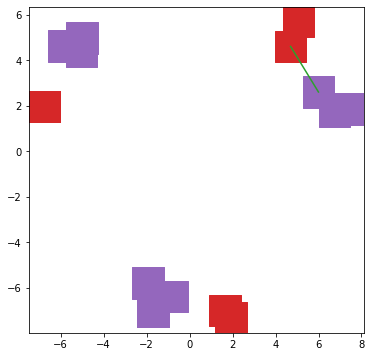

In [105]:
s=1e3
pl.figure(figsize=(6,6))
#ot.plot.plot2D_samples_mat(X,Cx, Px, c='C2')
#ot.plot.plot2D_samples_mat(Cy,Y, Py, c='C2')
#ot.plot.plot2D_samples_mat(X,Y, P, c='C2')
ot.plot.plot2D_samples_mat(Cx,Cy, Pz, c='C2')
#pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*s)
#pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*s)
pl.scatter(Cx[:, 0], Cx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
pl.scatter(Cy[:, 0], Cy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")

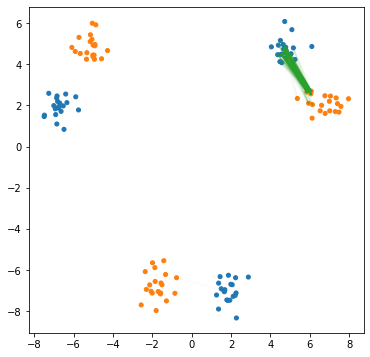

In [106]:
s=1e3
pl.figure(figsize=(6,6))
#ot.plot.plot2D_samples_mat(X,Cx, Px, c='C2')
#ot.plot.plot2D_samples_mat(Cy,Y, Py, c='C2')
ot.plot.plot2D_samples_mat(X,Y, P, c='C2')
ot.plot.plot2D_samples_mat(Cx,Cy, Pz, c='C2')
pl.scatter(X[:, 0], X[:, 1], c='C0', label='Source',s=a*s)
pl.scatter(Y[:, 0], Y[:, 1], c='C1', label='Target',s=b*s)
#pl.scatter(Cx[:, 0], Cx[:, 1], c='C3', label='Source',s=np.sum(Px,0)*s,marker="s")
#pl.scatter(Cy[:, 0], Cy[:, 1], c='C4', label='Target',s=np.sum(Py,1)*s,marker="s")